COVID-19 Analysis

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
raw_data = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data.csv')
raw_data.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [41]:
state_cases = raw_data.groupby(by=['Detected State'])['Patient Number'].count().reset_index(name="Cases")
state_cases = state_cases.sort_values('Cases', ascending = False)
top_10_states = state_cases.head(10)

top_10_states

,Detected State,Cases
18,Maharashtra,8068
9,Gujarat,3301
7,Delhi,2918
25,Rajasthan,2185
17,Madhya Pradesh,2090
26,Tamil Nadu,1885
29,Uttar Pradesh,1873
1,Andhra Pradesh,1097
27,Telangana,1001
31,West Bengal,611


In [60]:
raw_data_top_10 = raw_data[raw_data['Detected State'].isin(state_cases['Detected State'])]
raw_data_top_10 = raw_data_top_10.iloc[:,2:11]
raw_data_top_10['Date Announced'] = pd.to_datetime(raw_data_top_10['Date Announced'],infer_datetime_format=True)

print(max(raw_data_top_10['Date Announced']))
print(min(raw_data_top_10['Date Announced']))
raw_data_top_10.head()

2020-04-26 00:00:00
2020-01-30 00:00:00


,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status
0,2020-01-30,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered
1,2020-02-02,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered
2,2020-02-03,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered
3,2020-03-02,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered
4,2020-03-02,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered


In [63]:
Kerala = raw_data_top_10[raw_data_top_10['Detected State']=='Kerala']

Kerala.head()

,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status
0,2020-01-30,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered
1,2020-02-02,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered
2,2020-02-03,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered
34,2020-03-08,NaN,24,M,Ranni,Pathanamthitta,Kerala,KL,Recovered
35,2020-03-08,NaN,54,M,Ranni,Pathanamthitta,Kerala,KL,Recovered


In [69]:
Kerala_Cases = (Kerala.groupby(by=['Date Announced','Current Status'])['Date Announced'].count().reset_index(name="Cases")).sort_values(by = 'Date Announced')
Kerala_Cases['Confirmed'] = 'Confirmed'

print(Kerala_Cases['Current Status'].unique())
Kerala_Cases.head(10)

['Recovered' 'Hospitalized' 'Deceased']


,Date Announced,Current Status,Cases,Confirmed
0,2020-01-30,Recovered,1,Confirmed
1,2020-02-02,Recovered,1,Confirmed
2,2020-02-03,Recovered,1,Confirmed
3,2020-03-08,Recovered,5,Confirmed
4,2020-03-09,Recovered,1,Confirmed
5,2020-03-10,Hospitalized,1,Confirmed
6,2020-03-10,Recovered,7,Confirmed
7,2020-03-12,Recovered,2,Confirmed
8,2020-03-13,Recovered,3,Confirmed
9,2020-03-15,Recovered,2,Confirmed


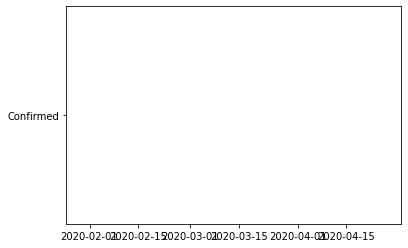

In [72]:
plt.bar(Kerala_Cases['Date Announced'], Kerala_Cases.Confirmed,label="Confirm Cases")
plt.bar(Kerala_Cases['Date Announced'], Kerala_Cases.Confirmed,label="Confirm Cases")
plt.bar(p.Date, p.Recovered,label="Recovered Cases")
plt.bar(p.Date, p.Deaths,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed vs Recovery vs Deaths',fontsize = 35)
plt.show()